In [1]:
# In order to be able to pull data using API without error,
    #Add "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in terminal to open Jupyter notebook with the
        #rate limit of 10

# The code in this cell is provided by the CoinMarketCap API documentations

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from dotenv import load_dotenv

load_dotenv() #load environment variables from .envfile

API_KEY = os.getenv('API_KEY')
url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50', 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': API_KEY,
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df.head()

C:\Users\samue\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.932414e+07,1.932414e+07,NaN,1,NaN,NaN,NaN,2023-03-21T22:13:00.000Z,28028.133878,3.642100e+10,-19.4334,0.165327,0.219108,13.846414,14.133831,25.249207,66.935871,5.416195e+11,45.9400,5.885908e+11,NaN,2023-03-21T22:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:15:24.874430
1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-21T22:13:00.000Z,1792.226047,1.091483e+10,-0.7139,0.022345,2.268574,5.149969,6.192786,9.324425,47.914851,2.193216e+11,18.6079,2.193216e+11,NaN,2023-03-21T22:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:15:24.874430
2,825,Tether,USDT,tether,49827,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.685642e+10,8.009174e+10,NaN,3,NaN,NaN,NaN,2023-03-21T22:13:00.000Z,1.000423,5.029980e+10,-7.9331,0.006210,-0.154964,-0.273497,0.017114,0.025536,0.037733,7.688893e+10,6.5235,8.012562e+10,NaN,2023-03-21T22:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 22:15:24.874430
3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578907e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-21T22:13:00.000Z,336.637980,6.359430e+08,-6.6191,-0.014537,0.029439,9.218725,7.273914,11.203311,36.307355,5.315200e+10,4.5096,5.385533e+10,NaN,2023-03-21T22:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 22:15:24.874430
4,3408,USD Coin,USDC,usd-coin,11054,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.528963e+10,3.528963e+10,NaN,5,NaN,NaN,NaN,2023-03-21T22:13:00.000Z,0.997495,5.170044e+09,-23.1537,0.034676,-0.080051,-0.151142,-0.257279,-0.294425,-0.249983,3.520122e+10,2.9875,3.520122e+10,NaN,2023-03-21T22:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 22:15:24.874430


# Below is the function to run the API code

In [7]:
def api_runner():
    global df
    API_KEY = os.getenv('API_KEY')
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50', 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': API_KEY,
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      #print(e)
    
    # If the data is only kept in a DataFrame, the code here is used. I opted to save it in a CSV in my computer
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
    
        df = pd.json_normalize(data['data'])
        df['timestamp']= pd.to_datetime('now')
        df

    if not os.path.isfile(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv'):
        df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv', mode= 'a', header= False)

In [8]:
from time import time
from time import sleep

In [9]:
# The api can only be run 333 times as restricted by CoinMarketCap
for i in range(333):
    api_runner()
    print("API run successfully")
    sleep(60) #API runner will sleep for 60 seconds before running again
exit()

API run successfully
API run successfully


KeyboardInterrupt: 

In [10]:
df1 = pd.read_csv(r'C:\Users\samue\OneDrive\Documents\GitHub\Learning-Projects\Crypto data API\API_DATA.csv')

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df1.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19324043.00000,19324043.00000,NaN,1,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,27990.51671,36468438958.07639,-20.06150,-0.45043,-0.49831,14.61832,14.02288,25.71230,66.64051,540889948437.80737,45.96420,587800850846.47998,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
1,1,1027,Ethereum,ETH,ethereum,6597,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1792.88204,10938835939.95141,-1.68700,0.08782,1.88736,6.15449,6.40702,9.37803,47.98753,219401906431.01251,18.64340,219401906431.01001,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
2,2,825,Tether,USDT,tether,49826,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,76856420219.05283,80091735571.99397,NaN,3,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,1.00025,50231204175.61670,-8.69590,-0.00099,-0.13188,-0.23921,0.00134,0.00525,0.01920,76875649334.78589,6.53240,80111774148.45000,NaN,2023-03-21T21:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-21 21:31:00.757898
3,3,1839,BNB,BNB,bnb,1218,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157890705.12470,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,336.72736,641740946.92646,-4.85440,-0.33696,0.40760,9.48338,7.81810,11.69635,36.34971,53166119571.66254,4.51770,53869630049.48000,NaN,2023-03-21T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-21 21:31:00.757898
4,4,3408,USD Coin,USDC,usd-coin,11051,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35289490658.01458,35289490658.01458,NaN,5,NaN,NaN,NaN,2023-03-21T21:28:00.000Z,0.99730,5209730230.19625,-22.05580,0.03294,-0.08059,-0.13396,-0.26782,-0.31248,-0.27452,35194034078.09309,2.99120,35194034078.09000,NaN,2023-03-21T21:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-21 21:31:00.757898


In [13]:
df1.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

Below I will be grouping by the different coins and calculating their average percent change for a given interval 

In [15]:
df2 = df1.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h'
                                          , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'
                                          , 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.26877,-0.19142,14.38357,14.19234,25.76078,66.92881
Ethereum,-0.05780,2.06190,5.86449,6.40967,9.47293,48.07967
Tether,0.00409,-0.13671,-0.25164,0.01341,0.01978,0.03325
BNB,-0.30910,0.72294,9.42729,7.77191,11.56074,36.45669
USD Coin,0.02278,-0.07335,-0.13405,-0.25801,-0.28871,-0.25970


In [17]:
df3 = df2.stack()
df3 = df3.to_frame(name = 'values')
df3.he

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.26877
                  quote.USD.percent_change_24h  -0.19142
                  quote.USD.percent_change_7d   14.38357
                  quote.USD.percent_change_30d  14.19234
                  quote.USD.percent_change_60d  25.76078
                  quote.USD.percent_change_90d  66.92881
Ethereum          quote.USD.percent_change_1h   -0.05780
                  quote.USD.percent_change_24h   2.06190
                  quote.USD.percent_change_7d    5.86449
                  quote.USD.percent_change_30d   6.40967
                  quote.USD.percent_change_60d   9.47293
                  quote.USD.percent_change_90d  48.07967
Tether            quote.USD.percent_change_1h    0.00409
                  quote.USD.percent_change_24h  -0.13671
                  quote.USD.percent_change_7d   -0.25164
                  quote.USD.percent_change_30d   0.01341
                  quote.USD.percent_change_60d   0.01978
                  quote.USD.percent_change_90d   0.03325
BNB               quote.USD.percent_change_1h   -0.30910
                  quote.USD.percent_change_24h   0.72294
                  quote.USD.percent_change_7d    9.42729
                  quote.USD.percent_change_30d   7.77191
                  quote.USD.percent_change_60d  11.56074
                  quote.USD.percent_change_90d  36.45669
USD Coin          quote.USD.percent_change_1h    0.02278
                  quote.USD.percent_change_24h  -0.07335
                  quote.USD.percent_change_7d   -0.13405
                  quote.USD.percent_change_30d  -0.25801
                  quote.USD.percent_change_60d  -0.28871
                  quote.USD.percent_change_90d  -0.25970
XRP               quote.USD.percent_change_1h   -3.13981
                  quote.USD.percent_change_24h  23.98378
                  quote.USD.percent_change_7d   26.08735
                  quote.USD.percent_change_30d  20.72363
                  quote.USD.percent_change_60d  14.22966
                  quote.USD.percent_change_90d  35.90553
Cardano           quote.USD.percent_change_1h    0.42440
                  quote.USD.percent_change_24h  10.72635
                  quote.USD.percent_change_7d    9.08161
                  quote.USD.percent_change_30d  -7.43217
                  quote.USD.percent_change_60d   3.19552
                  quote.USD.percent_change_90d  48.00925
Dogecoin          quote.USD.percent_change_1h   -0.22271
                  quote.USD.percent_change_24h   6.54187
                  quote.USD.percent_change_7d    3.79323
                  quote.USD.percent_change_30d -12.03643
                  quote.USD.percent_change_60d -10.38596
                  quote.USD.percent_change_90d   4.53841
Polygon           quote.USD.percent_change_1h   -0.00322
                  quote.USD.percent_change_24h   1.41686
                  quote.USD.percent_change_7d   -2.37095
                  quote.USD.percent_change_30d -23.35323
                  quote.USD.percent_change_60d  13.18922
                  quote.USD.percent_change_90d  44.86728
Solana            quote.USD.percent_change_1h   -0.25475
                  quote.USD.percent_change_24h  -0.54666
                  quote.USD.percent_change_7d    9.10769
                  quote.USD.percent_change_30d  -9.09799
                  quote.USD.percent_change_60d  -5.91532
                  quote.USD.percent_change_90d  87.20969
Binance USD       quote.USD.percent_change_1h   -0.00213
                  quote.USD.percent_change_24h  -0.10525
                  quote.USD.percent_change_7d   -0.10890
                  quote.USD.percent_change_30d  -0.16475
                  quote.USD.percent_change_60d  -0.14295
                  quote.USD.percent_change_90d  -0.14940
Polkadot          quote.USD.percent_change_1h    1.40780
                  quote.USD.percent_change_24h   3.46641
                  quote.USD.percent_change_7d    3.51175
   

In [18]:
type(df3)

pandas.core.frame.DataFrame

In [19]:
index = pd.Index(range(int(df3.count())))
#df4 = df3.set_index(index)  --> ran this code first and then comment it out and reset the index in the dataframe
df4 = df3.reset_index()

In [20]:
df4.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26877
1,Bitcoin,quote.USD.percent_change_24h,-0.19142
2,Bitcoin,quote.USD.percent_change_7d,14.38357
3,Bitcoin,quote.USD.percent_change_30d,14.19234
4,Bitcoin,quote.USD.percent_change_60d,25.76078


In [24]:
# Rename the columns name from level_1 to percent_change
df4 = df4.rename(columns ={'level_1': 'percent_change'})
df4.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26877
1,Bitcoin,quote.USD.percent_change_24h,-0.19142
2,Bitcoin,quote.USD.percent_change_7d,14.38357
3,Bitcoin,quote.USD.percent_change_30d,14.19234
4,Bitcoin,quote.USD.percent_change_60d,25.76078


In [26]:
## Since the names of the catagories of percent change in the grouped dataframe are long,
    ##I change it to shorter names which will help with the visualizations below
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h'
                                          , 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d'
                                          , 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']
                                   , ['1h', '24h', '7d', '30d', '60d', '90d'])
df4.head()

,name,percent_change,values
0,Bitcoin,1h,-0.26877
1,Bitcoin,24h,-0.19142
2,Bitcoin,7d,14.38357
3,Bitcoin,30d,14.19234
4,Bitcoin,60d,25.76078


## Some Visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

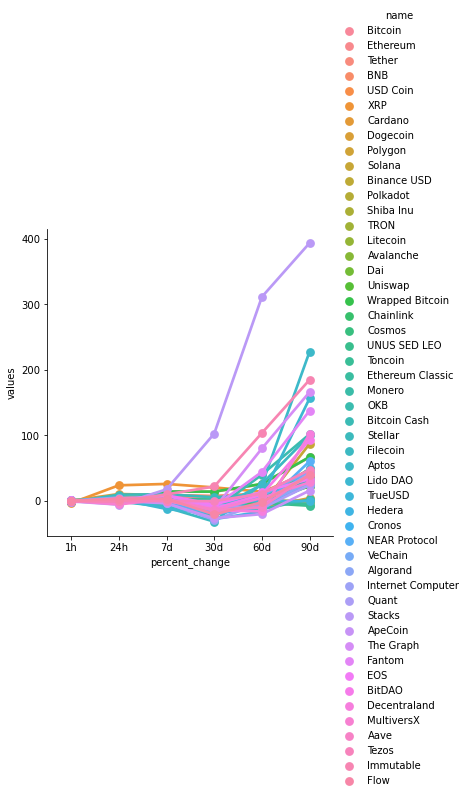

In [28]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df4, kind = 'point')

In [30]:
# Creating plots with specific columns

df5 = df1[['name','quote.USD.price','timestamp']]
df5 = df5.query(" name == ['Bitcoin'] ")
df5.head()

,name,quote.USD.price,timestamp
0,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
50,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
100,Bitcoin,27990.51671,2023-03-21 21:31:00.757898
150,Bitcoin,28045.76122,2023-03-21 21:50:32.277719
200,Bitcoin,28062.67268,2023-03-21 21:51:32.614521


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

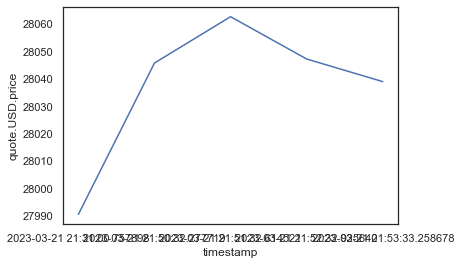

In [31]:
sns.set_theme(style="white")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df5)